In [41]:
import gspread
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from google.oauth2.service_account import Credentials

In [ ]:
SERVICE_ACCOUNT_FILE = '../../key/credentials.json'
SCOPES = ['https://www.googleapis.com/auth/spreadsheets',
          'https://www.googleapis.com/auth/drive']

creds = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(creds)

sheet = client.open("Recheck HC").worksheet("Recheck")
data = sheet.get_all_values()

df = pd.DataFrame(data[1:], columns=data[0])

df.to_csv('../../dataset_qc/recheck_hc.csv')

In [ ]:
# cleaning and feature engineering
feature = df.copy()

count_feature = [
    'Count Hasil ASR', 'Count Hasil Pemeriksaan Kualitas', 'Count Efektif',
    'Count Kejelasan Suara', 'Count Suara Lain', 'Count Kelengkapan Rekaman',
    'Count Revisi text']

cols = ['Tanggal Pengerjaan', 'Red Label', *count_feature]

feature[count_feature] = (
    feature[count_feature]
    .apply(pd.to_numeric, errors='coerce')
    .fillna(0)
    .astype(int)
)

feature['Red Label'] = feature['Red Label'].replace('', 'CLEAR').astype('category')

# Reassigning
feature = feature[cols].copy()
feature['Tanggal Pengerjaan'] = pd.to_datetime(feature['Tanggal Pengerjaan'])

feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Tanggal Pengerjaan                6600 non-null   datetime64[ns]
 1   Red Label                         6600 non-null   category      
 2   Count Hasil ASR                   6600 non-null   int64         
 3   Count Hasil Pemeriksaan Kualitas  6600 non-null   int64         
 4   Count Efektif                     6600 non-null   int64         
 5   Count Kejelasan Suara             6600 non-null   int64         
 6   Count Suara Lain                  6600 non-null   int64         
 7   Count Kelengkapan Rekaman         6600 non-null   int64         
 8   Count Revisi text                 6600 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(7)
memory usage: 419.2 KB


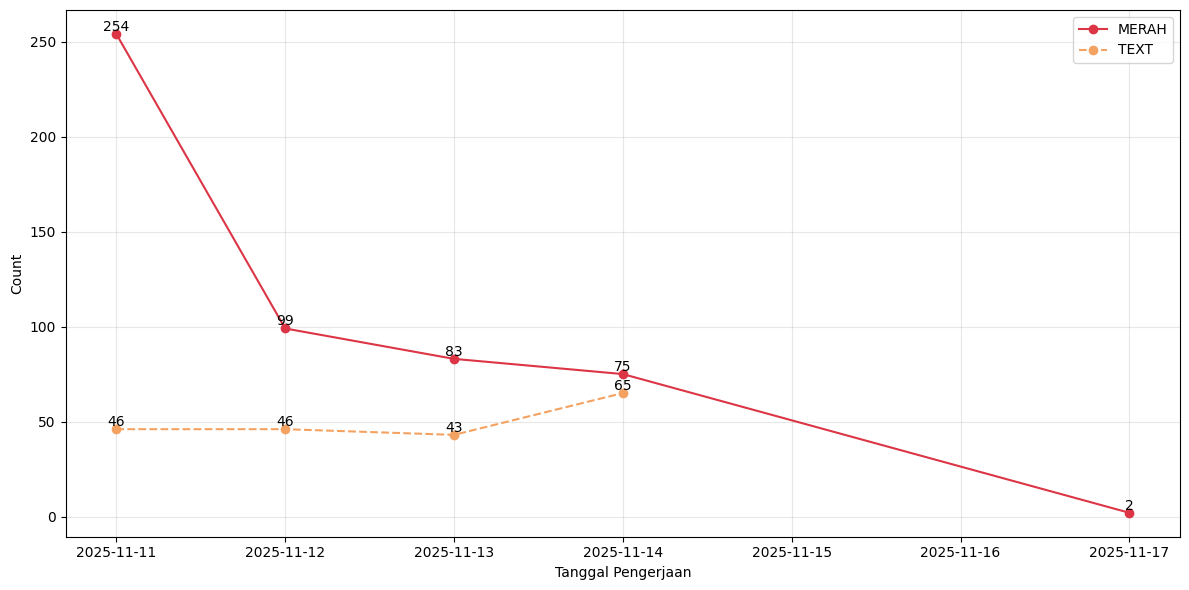

In [ ]:
# Filter
red_data = feature[feature['Red Label'].str.upper() == "MERAH"]
text_data = feature[feature['Red Label'].str.upper() == "TEXT"]

# Aggregate by date
red_daily = red_data.groupby('Tanggal Pengerjaan').size()
text_daily = text_data.groupby('Tanggal Pengerjaan').size()

# Plot
plt.figure(figsize=(12, 6))

plt.plot(
    red_daily.index,
    red_daily.values,
    marker='o',
    linestyle='-',
    label='MERAH',
    color='#dc3545'
)

for x, y in zip(red_daily.index, red_daily.values):
    plt.text(x, y, str(y), ha='center', va='bottom'   )

plt.plot(
    text_daily.index,
    text_daily.values,
    marker='o',
    linestyle='--',
    label='TEXT',
    color='#f4a261'
)

for x, y in zip(text_daily.index, text_daily.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.title('')
plt.xlabel('Tanggal Pengerjaan')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

plt.show()

In [9]:
feature

,Tanggal Pengerjaan,Red Label,Count Hasil ASR,Count Hasil Pemeriksaan Kualitas,Count Efektif,Count Kejelasan Suara,Count Suara Lain,Count Kelengkapan Rekaman,Count Revisi text
0,2025-11-11,CLEAR,0,0,0,0,0,0,0
1,2025-11-11,CLEAR,0,0,0,0,0,0,0
2,2025-11-11,TEXT,0,0,0,0,0,0,1
3,2025-11-11,CLEAR,0,0,0,0,0,0,0
4,2025-11-11,CLEAR,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6595,2025-11-17,CLEAR,0,0,0,0,0,0,0
6596,2025-11-17,CLEAR,0,0,0,0,0,0,0
6597,2025-11-17,CLEAR,0,0,0,0,0,0,0
6598,2025-11-17,CLEAR,0,0,0,0,0,0,0


,Tanggal Pengerjaan,Red Label,Count Hasil ASR,Count Hasil Pemeriksaan Kualitas,Count Efektif,Count Kejelasan Suara,Count Suara Lain,Count Kelengkapan Rekaman,Count Revisi text
0,2025-11-11,CLEAR,0,0,0,0,0,0,0
1,2025-11-11,CLEAR,0,0,0,0,0,0,0
2,2025-11-11,TEXT,0,0,0,0,0,0,1
3,2025-11-11,CLEAR,0,0,0,0,0,0,0
4,2025-11-11,CLEAR,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6595,2025-11-17,CLEAR,0,0,0,0,0,0,0
6596,2025-11-17,CLEAR,0,0,0,0,0,0,0
6597,2025-11-17,CLEAR,0,0,0,0,0,0,0
6598,2025-11-17,CLEAR,0,0,0,0,0,0,0


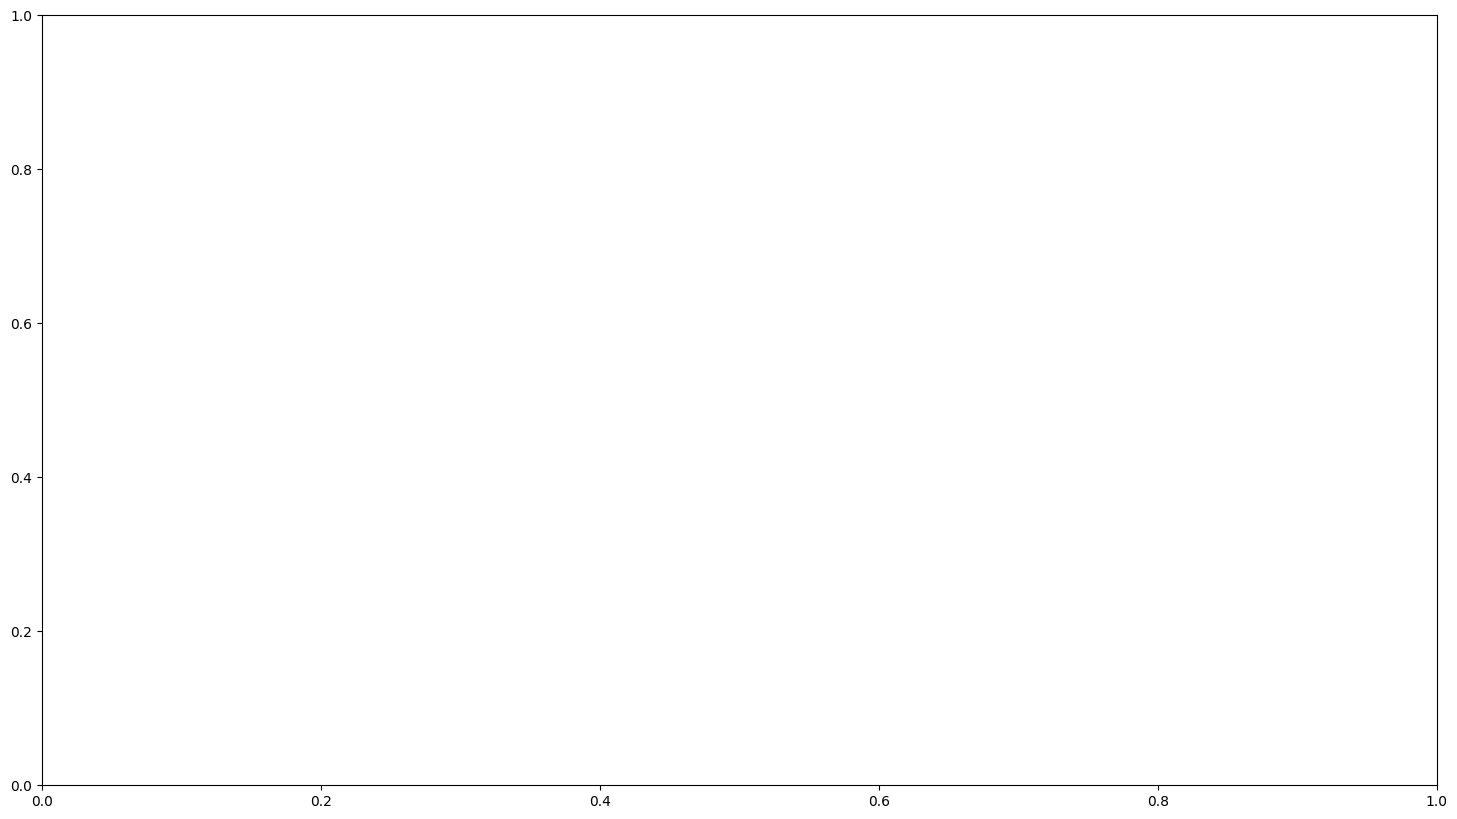

In [32]:
# visualization
fig, axes = plt.subplots(1, 1, figsize=(18, 10))

# 1. Lineplot of TEXT and MERAH
feature